In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from utils import (
    ESP32CSIMultiTaskModel,
    train_esp32_multitask_model,
    plot_training_results,
    visualize_predictions,
    preprocess_esp32_csi,
    run_predictions
)

In [2]:
filename = "cleaned_merged_labelled_dataset.csv"

In [3]:
df = pd.read_csv(filename)
print("DataFrame head:")
print(df.head())

DataFrame head:
                                            CSI_DATA  locationX  locationY  \
0  [28 -64 1 0 0 0 0 0 0 0 0 0 9 -23 9 -22 10 -23...          0          1   
1  [-99 -48 9 0 0 0 0 0 0 0 0 0 15 18 14 18 15 19...          0          1   
2  [-121 112 8 0 0 0 0 0 0 0 0 0 -1 19 -1 19 -1 2...          0          1   
3  [-121 112 8 0 0 0 0 0 0 0 0 0 19 14 18 15 19 1...          0          1   
4  [-122 -31 23 0 0 0 0 0 0 0 0 0 -6 17 -7 18 -7 ...          0          1   

   state  
0      1  
1      1  
2      1  
3      1  
4      1  


In [4]:
# train model
model, history = train_esp32_multitask_model(
    csv_file=filename,
    input_shape=(128, 50),  # 128 subcarriers, 50 samples per window
    epochs=25,
    batch_size=12
)

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - location_location_mae: 1.2569 - location_loss: 3.5371 - loss: 3.1153 - presence_accuracy: 0.5319 - presence_loss: 1.3396 - val_location_location_mae: 2.4490 - val_location_loss: 6.3163 - val_loss: 8.7542 - val_presence_accuracy: 0.4571 - val_presence_loss: 5.6502 - learning_rate: 5.0000e-04
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - location_location_mae: 0.4659 - location_loss: 0.3363 - loss: 0.7257 - presence_accuracy: 0.7294 - presence_loss: 0.5634 - val_location_location_mae: 0.3733 - val_location_loss: 0.1853 - val_loss: 4.8283 - val_presence_accuracy: 0.4571 - val_presence_loss: 4.7813 - learning_rate: 5.0000e-04
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - location_location_mae: 0.5061 - location_loss: 0.4025 - loss: 0.5599 - presence_accuracy: 0.8532 - presence_loss: 0.3574 - val_location_location_mae: 0.3809 - val_location_loss: 0.1997 - val_loss: 6.7943 - val_presence_accuracy: 0.4571 - val_presence_loss: 

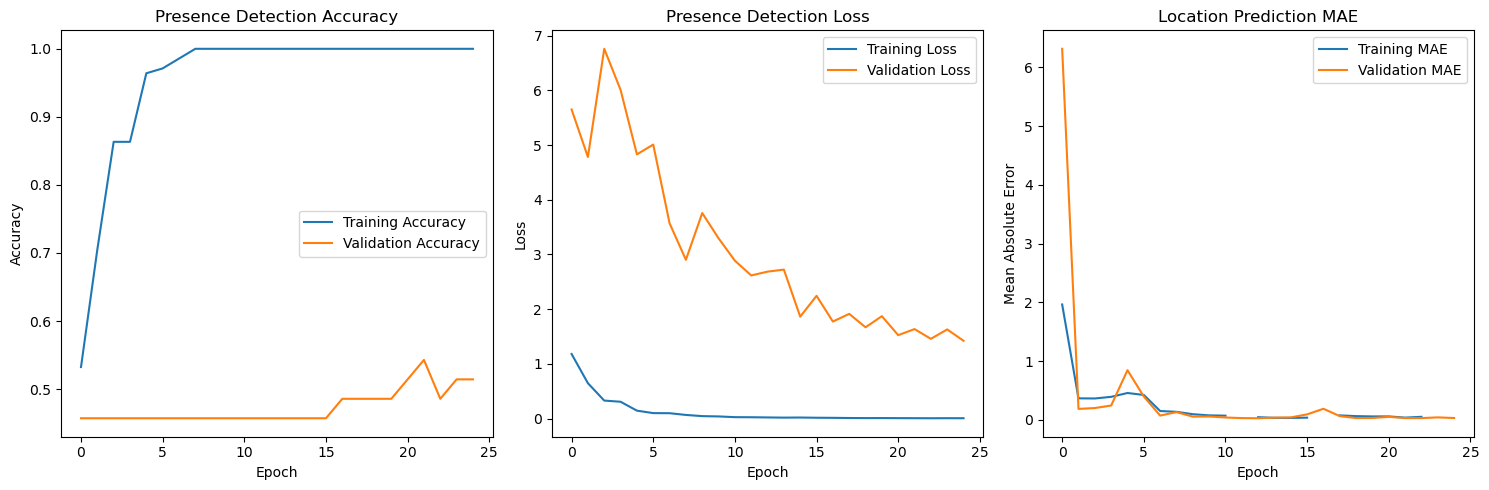

In [5]:
# visualize data
plot_training_results(history)

In [6]:
# SAVE WEIGHTS
model.model.save('weights/weights_v16.h5')

In [7]:
metrics = run_predictions('weights/best_model_v16.h5', 'cleaned_merged_labelled_dataset.csv')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Detailed results for first 5 samples:

Sample 1:
Presence: True=1, Predicted=1
Location: True=(0.0, 1.0), Predicted=(0.1, 0.8)

Sample 2:
Presence: True=1, Predicted=1
Location: True=(0.0, 1.0), Predicted=(-0.1, 1.0)

Sample 3:
Presence: True=1, Predicted=1
Location: True=(0.0, 1.0), Predicted=(0.1, 0.8)

Sample 4:
Presence: True=1, Predicted=1
Location: True=(0.0, 1.0), Predicted=(-0.2, 1.1)

Sample 5:
Presence: True=1, Predicted=1
Location: True=(0.0, 1.0), Predicted=(0.1, 1.0)

Overall Metrics:
Presence Detection Accuracy: 0.90
Location Mean Absolute Error: 0.11
Number of samples evaluated: 174
